# We start the case with importing the liabries

In [1]:
#importing warnings
import warnings
warnings.filterwarnings('ignore')
#importing data manipulation liabries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf
#importing machine learning liabries 
from sklearn.linear_model import LinearRegression
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures

# Next we are describing the data by checking the rows and colums, the data type, correlations and more 

In [2]:
#loading the dataset
df = pd.read_csv('Fish.csv')
#overview of data colums 
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [3]:
#overview of total colums and variables 
df.shape

(159, 7)

In [4]:
#changing the names of colums
df.rename(columns= {'Length1':'LengthVer', 'Length2':'LengthDia', 'Length3':'LengthCro'}, inplace=True)
df.head()

,Species,Weight,LengthVer,LengthDia,LengthCro,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [5]:
#information of dataframe 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Species    159 non-null    object 
 1   Weight     159 non-null    float64
 2   LengthVer  159 non-null    float64
 3   LengthDia  159 non-null    float64
 4   LengthCro  159 non-null    float64
 5   Height     159 non-null    float64
 6   Width      159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [6]:
#checking for null values 
df.isnull().sum()

Species      0
Weight       0
LengthVer    0
LengthDia    0
LengthCro    0
Height       0
Width        0
dtype: int64

In [7]:
#True or false for null values 
df.isnull().values.any()

False

In [8]:
#looking at the species in detail 
df['Species'] = df['Species'].astype('category')
df.describe(include = 'category')

,Species
count,159
unique,7
top,Perch
freq,56


In [9]:
#looking at which species weight in comparison to each other 
grp = df.groupby('Species').describe().T
grp.loc['Weight', :]

Species,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
count,35.000000,11.000000,56.000000,17.000000,20.000000,14.000000,6.000000
mean,617.828571,154.818182,382.239286,718.705882,152.050000,11.178571,531.000000
std,209.205709,78.755086,347.617717,494.140765,88.828916,4.131526,309.602972
min,242.000000,55.000000,5.900000,200.000000,0.000000,6.700000,270.000000
25%,462.500000,105.000000,120.000000,345.000000,104.250000,8.950000,279.000000
50%,610.000000,145.000000,207.500000,510.000000,147.500000,9.850000,423.000000
75%,717.000000,185.000000,692.500000,950.000000,171.750000,12.200000,735.000000
max,1000.000000,300.000000,1100.000000,1650.000000,390.000000,19.900000,1000.000000


In [10]:
#describe hepls us to see mean,count,std,min,max and percentages
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight,159.0,398.326415,357.978317,0.0000,120.00000,273.0000,650.0000,1650.000
LengthVer,159.0,26.247170,9.996441,7.5000,19.05000,25.2000,32.7000,59.000
LengthDia,159.0,28.415723,10.716328,8.4000,21.00000,27.3000,35.5000,63.400
LengthCro,159.0,31.227044,11.610246,8.8000,23.15000,29.4000,39.6500,68.000
Height,159.0,8.970994,4.286208,1.7284,5.94480,7.7860,12.3659,18.957
Width,159.0,4.417486,1.685804,1.0476,3.38565,4.2485,5.5845,8.142


In [11]:
#tabulate the correlations between the variables 
df.corr()

,Weight,LengthVer,LengthDia,LengthCro,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
LengthVer,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
LengthDia,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
LengthCro,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


in this matrix, the correlation coefficient between Weight and LengthVer is 0.915712, which indicates a strong positive correlation between these two variables. This means that as the length of the fish from the nose to the tail increases, so does its weight. Similarly, the correlation coefficient between Height and Width is 0.792881, indicating a moderate positive correlation between these two variables, which means that as the height of the fish increases, its width also tends to increase.

# Next we start to do some basic explorative data analysis for the dataset 

<AxesSubplot:>

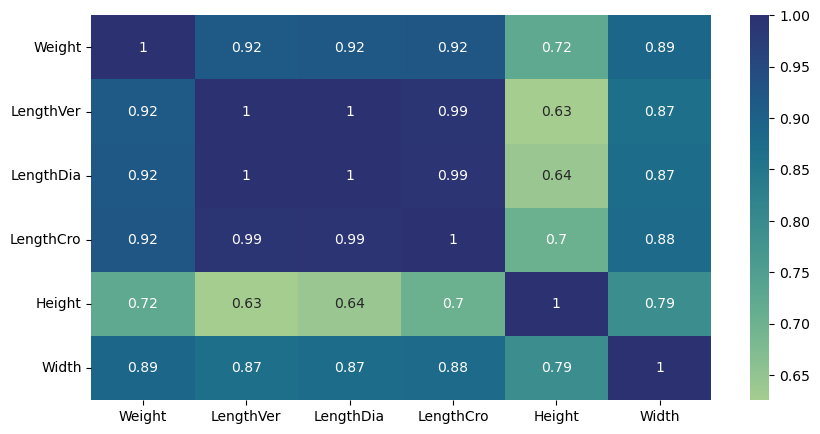

In [12]:
#a visualisation of the correlation between variables using a heatmap
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(), annot = True, cmap = "crest")

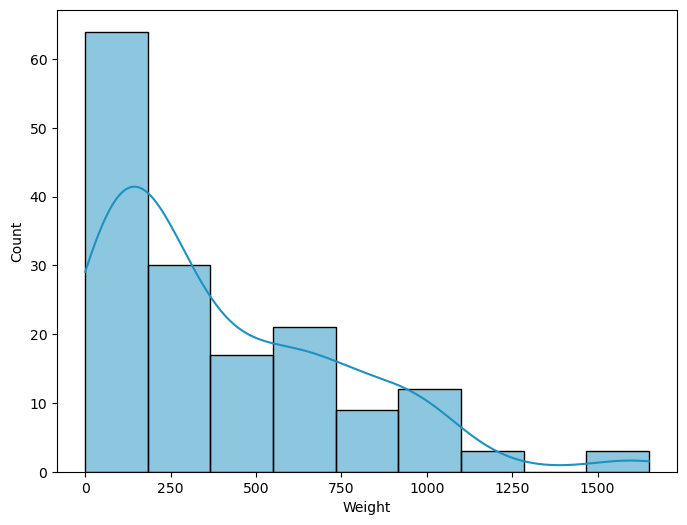

In [13]:
#visulaisation of the weight variable 
plt.figure(figsize = (8,6))
sns.histplot(x = 'Weight', data = df, color = '#1d91c0', kde = True)
plt.show()

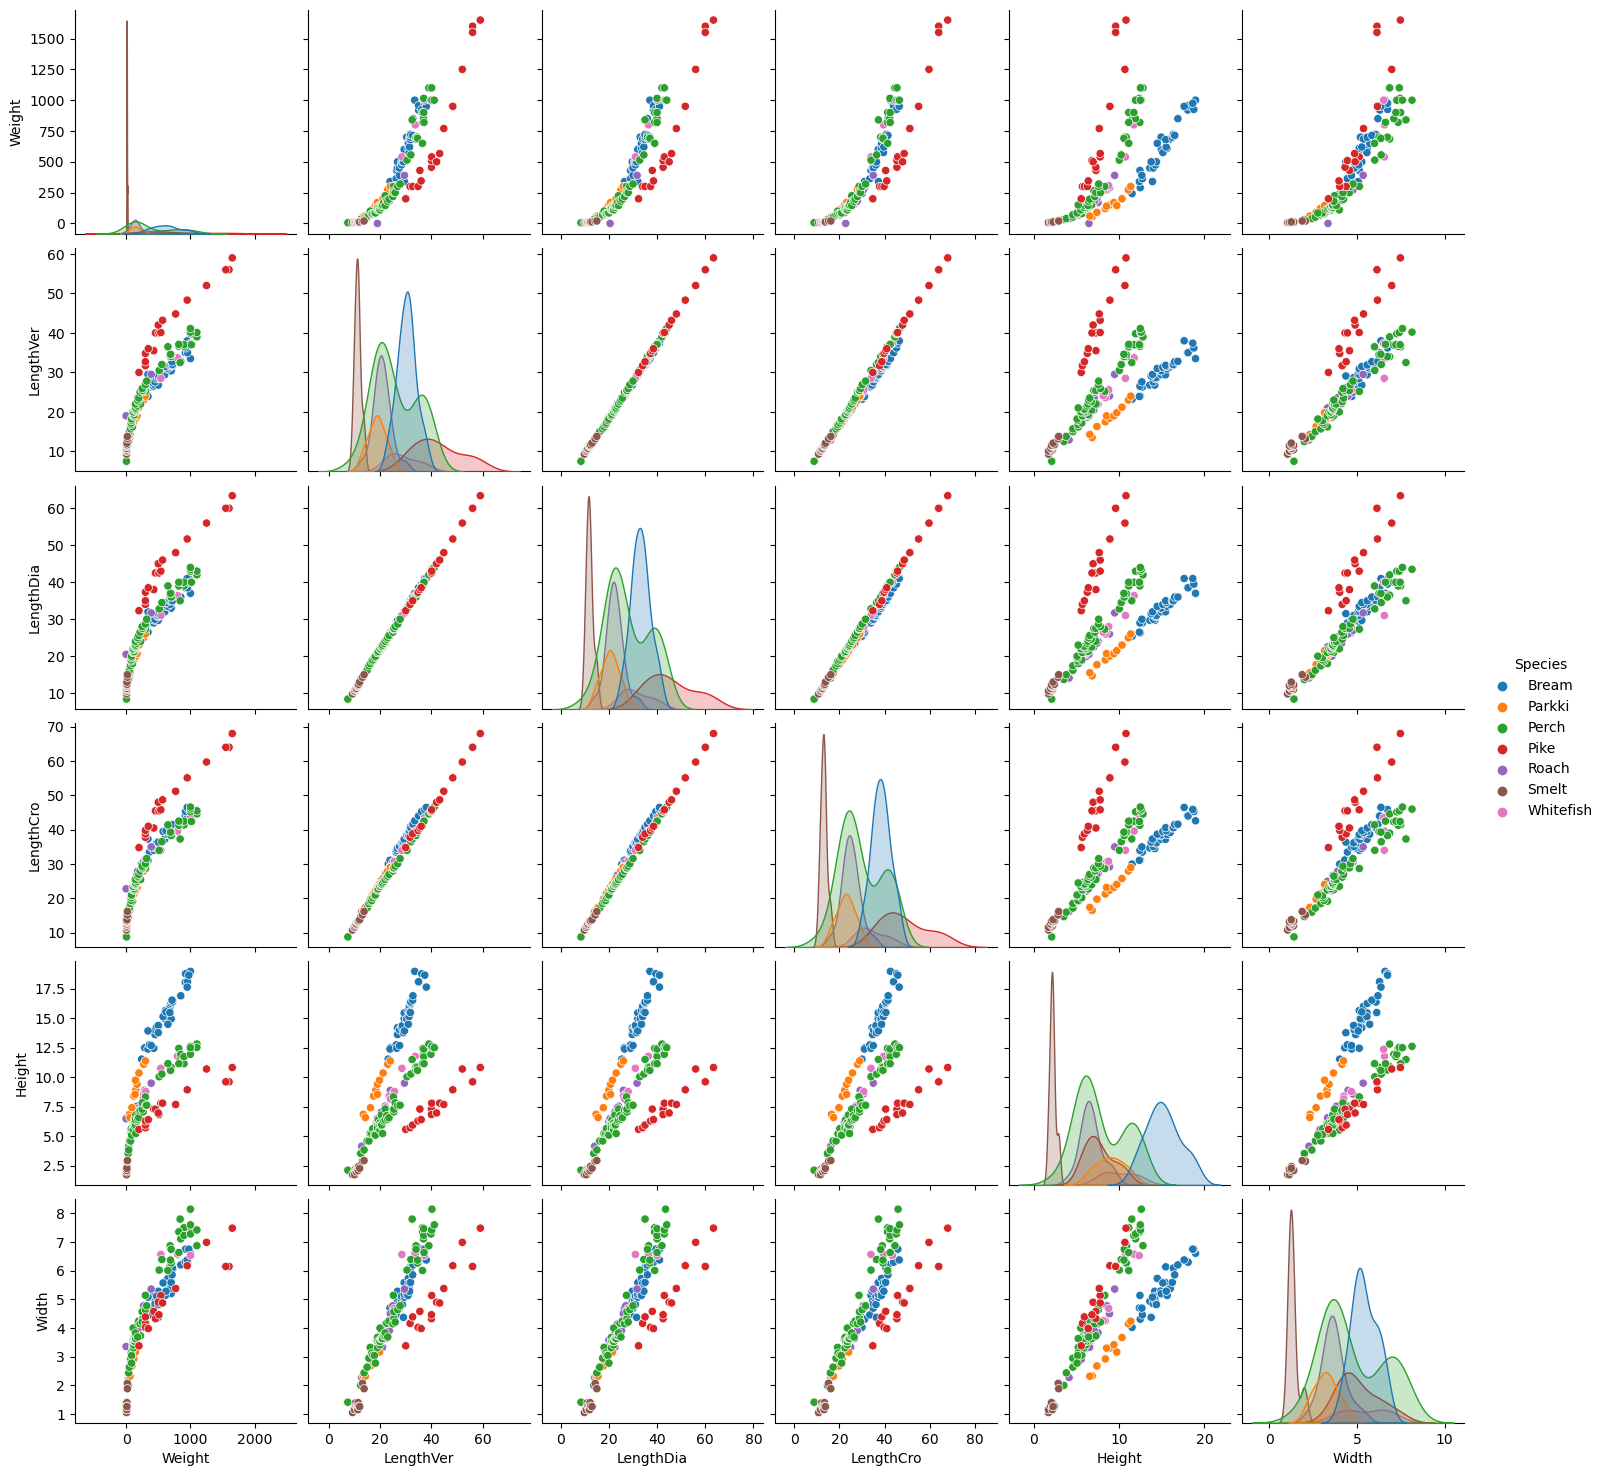

In [14]:
#Visualisation of the dataset as a pair plot
sns.pairplot(df, kind='scatter', hue='Species')

In [15]:
#getting numeric data
numeric_columns = df.select_dtypes(include='number').columns

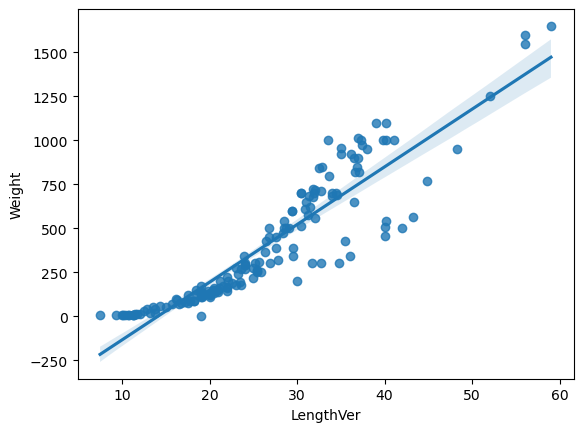

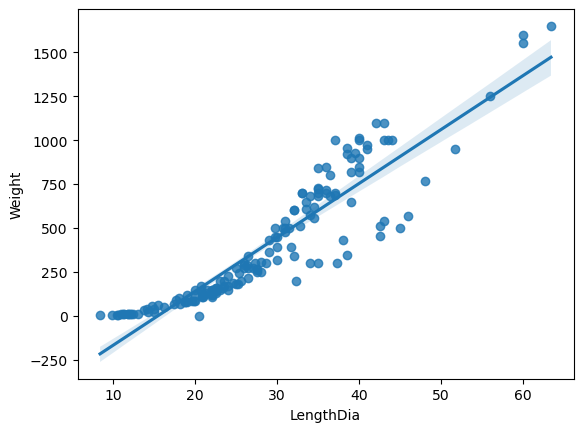

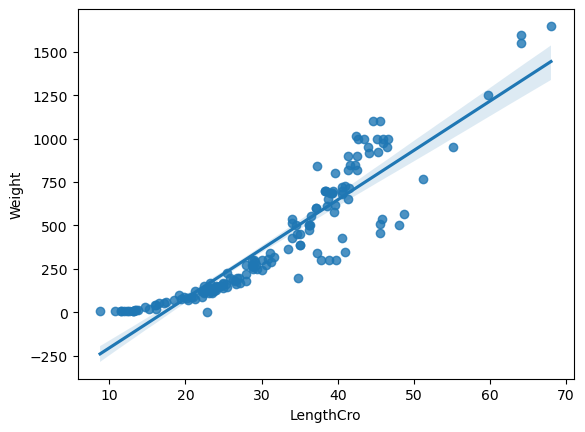

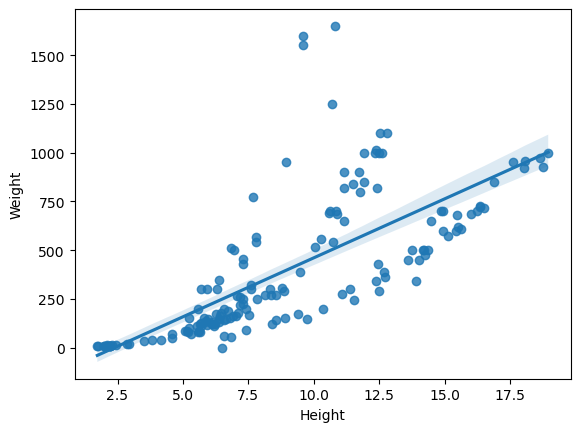

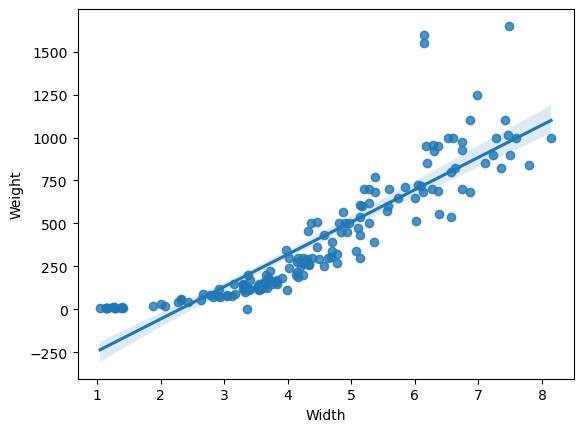

In [16]:
#plots the numeric data as a scatter plot with a linear regression line for x (depandant) and y(dependant)
for col in numeric_columns:
    if col != 'Weight':
        sns.regplot(x=col, y='Weight', data=df)
        plt.show()

# We are looking for outliers and if their are, removeing it

<AxesSubplot:xlabel='LengthCro'>

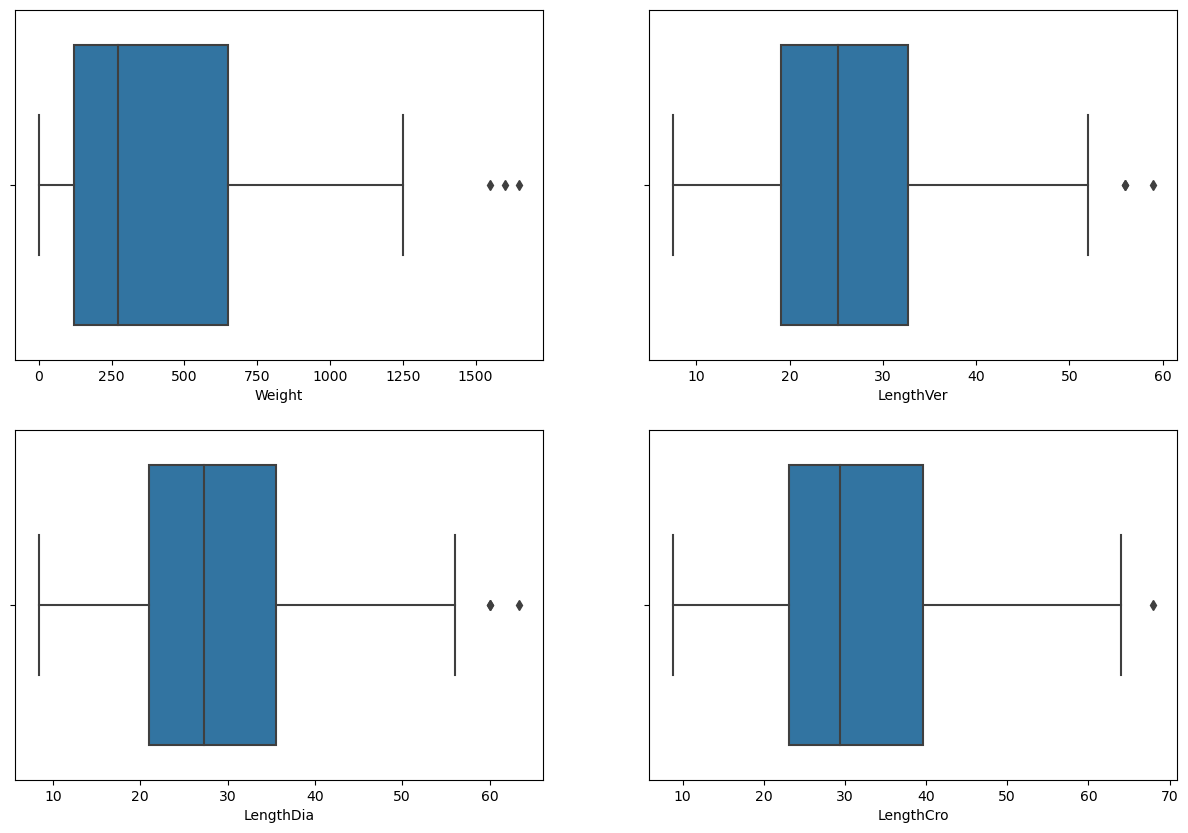

In [17]:
#plotting a boxplot for 4 variables 
plt.figure(figsize = (15,10))
plt.subplot(2,2,1)
sns.boxplot(x=  df["Weight"])

plt.subplot(2,2,2)
sns.boxplot(x = df["LengthVer"])

plt.subplot(2,2,3)
sns.boxplot(x = df["LengthDia"])

plt.subplot(2,2,4)
sns.boxplot(x = df["LengthCro"])

In [18]:
#identifying the outliers
def outliers(df, col):
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    return df[ (df[col]<lower_bound) | (df[col]>upper_bound) ]

In [19]:
for col in numeric_columns:
    print('#'*20, col)
    print(outliers(df, col))

#################### Weight
    Species  Weight  LengthVer  LengthDia  LengthCro  Height  Width
142    Pike  1600.0       56.0       60.0       64.0   9.600  6.144
143    Pike  1550.0       56.0       60.0       64.0   9.600  6.144
144    Pike  1650.0       59.0       63.4       68.0  10.812  7.480
#################### LengthVer
    Species  Weight  LengthVer  LengthDia  LengthCro  Height  Width
142    Pike  1600.0       56.0       60.0       64.0   9.600  6.144
143    Pike  1550.0       56.0       60.0       64.0   9.600  6.144
144    Pike  1650.0       59.0       63.4       68.0  10.812  7.480
#################### LengthDia
    Species  Weight  LengthVer  LengthDia  LengthCro  Height  Width
142    Pike  1600.0       56.0       60.0       64.0   9.600  6.144
143    Pike  1550.0       56.0       60.0       64.0   9.600  6.144
144    Pike  1650.0       59.0       63.4       68.0  10.812  7.480
#################### LengthCro
    Species  Weight  LengthVer  LengthDia  LengthCro  Height  W

In [20]:
#showing outlier
df.loc[142:144, :]

,Species,Weight,LengthVer,LengthDia,LengthCro,Height,Width
142,Pike,1600.0,56.0,60.0,64.0,9.600,6.144
143,Pike,1550.0,56.0,60.0,64.0,9.600,6.144
144,Pike,1650.0,59.0,63.4,68.0,10.812,7.480


In [21]:
#dropping colums with outlier
df.drop([142, 143, 144], inplace=True)

<AxesSubplot:xlabel='LengthCro'>

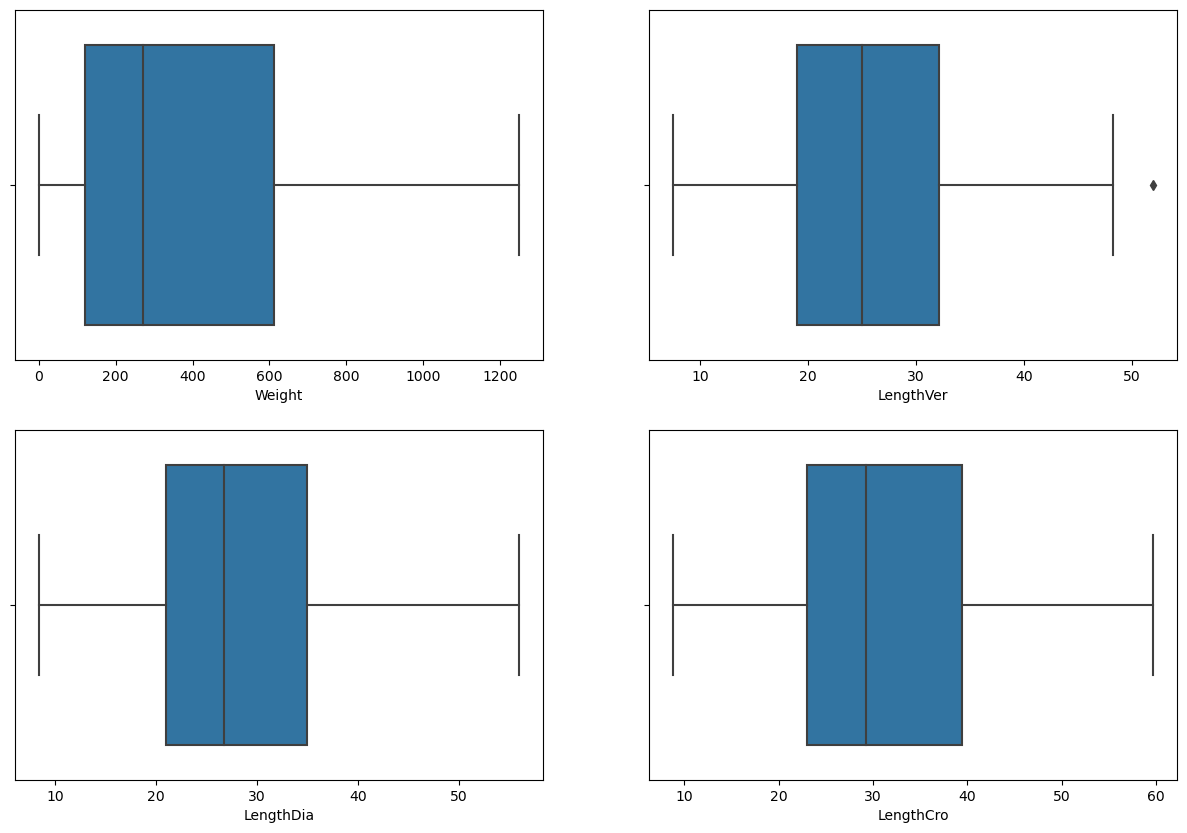

In [22]:
#plotting a boxplot without outliers
plt.figure(figsize = (15,10))
plt.subplot(2,2,1)
sns.boxplot(x=  df["Weight"])

plt.subplot(2,2,2)
sns.boxplot(x = df["LengthVer"])

plt.subplot(2,2,3)
sns.boxplot(x = df["LengthDia"])

plt.subplot(2,2,4)
sns.boxplot(x = df["LengthCro"])

In [23]:
#new table without outliers 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight,156.0,375.217308,319.546978,0.0000,120.000000,271.0000,612.500000,1250.000
LengthVer,156.0,25.655769,9.119630,7.5000,19.000000,25.0000,32.125000,52.000
LengthDia,156.0,27.786538,9.792651,8.4000,21.000000,26.7500,35.000000,56.000
LengthCro,156.0,30.571154,10.695359,8.8000,23.025000,29.2500,39.425000,59.700
Height,156.0,8.951128,4.324325,1.7284,5.931675,7.6478,12.378550,18.957
Width,156.0,4.375719,1.672188,1.0476,3.369600,4.2433,5.424375,8.142


# This section is where we build our regression model and then run some predictions as well as model accuracy 

In [24]:
#identifying the x and y parameters 
X = df.iloc[:,2:7]
y = df["Weight"]

In [25]:
#installing split and train model 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [26]:
#creating a linear regression model
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [27]:
#calculating the intercept and coefficient for all dependant variables 
print("coefficient = ", reg.coef_)
print("intersept = ", reg.intercept_)

coefficient =  [ 89.93843031 -32.68619524 -37.53063323  33.07275974  60.72005923]
intersept =  -441.00887253881785


In [28]:
#creating a linear regression equation
print('y = ' + str('%.2f' % reg.intercept_) + ' + ' + str('%.2f' % reg.coef_[0]) + '*X1 ' + str('%.2f' % reg.coef_[1]) + '*X2 ' +
      str('%.2f' % reg.coef_[2]) + '*X3 + ' + str('%.2f' % reg.coef_[3]) + '*X4 + ' + str('%.2f' % reg.coef_[4]) + '*X5')

y = -441.01 + 89.94*X1 -32.69*X2 -37.53*X3 + 33.07*X4 + 60.72*X5


# This section is where we check if this model fits with the linear regression assumptions

In [29]:
#assigning varible to x test set 
y_pred = reg.predict(X_test)

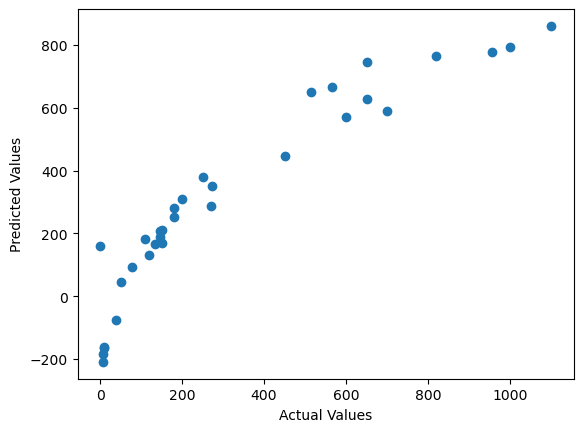

In [30]:
#scatter plot for test and predicted values 
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

This code is creating a scatter plot of the predicted values versus the actual values for a set of data.The graph above shows the plot clustering around the y=x axis meaing that the model predictions is accurate 

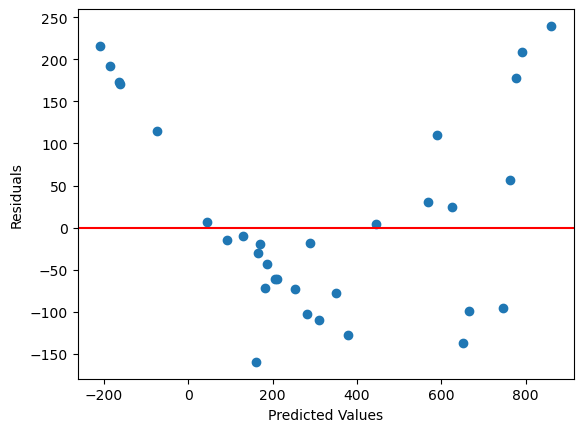

In [31]:
#reating a scatter plot of the residuals versus the predicted values
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

This code is creating a scatter plot of the residuals versus the predicted values for a linear regression model. the residuals are randomly scattered around the horizontal line at y=0, this suggests that the linear regression model is performing well, and the error in the predictions is not dependent on the predicted values.

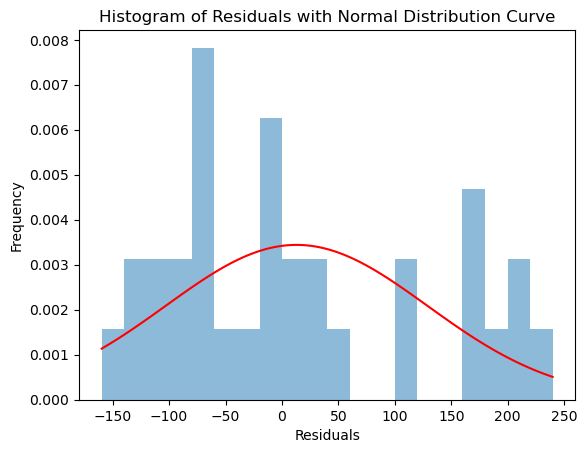

In [32]:
#creating a bell curve inside a histogram
import scipy.stats as stats
# Plot histogram of residuals
plt.hist(residuals, bins=20, density=True, alpha=0.5)
# Generate PDF for normal distribution with mean and std of residuals
mu, std = stats.norm.fit(residuals)
pdf = stats.norm.pdf(np.linspace(min(residuals), max(residuals), 100), mu, std)
# Plot normal distribution curve
plt.plot(np.linspace(min(residuals), max(residuals), 100), pdf, color='r')
# Add labels and title
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals with Normal Distribution Curve')
plt.show()

This code is generating a histogram of residuals (the differences between the predicted and actual values) for a linear regression model, and superimposing a normal distribution curve (a bell curve) over the histogram. The residuals are normally distributed and centered around zero, this suggests that the linear regression model is a good fit for the data.

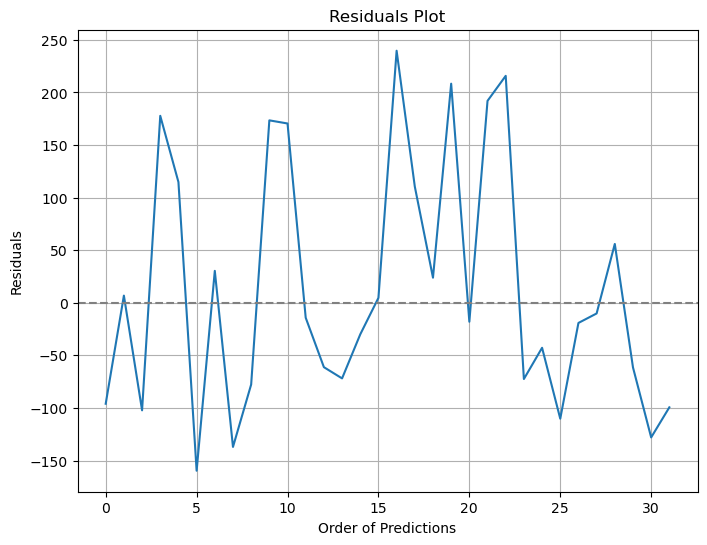

In [33]:
#creating a residual plot
ig, ax = plt.subplots(figsize=(8, 6))
# Plot the residuals as a line plot
sns.lineplot(x=range(len(residuals)), y=residuals, ax=ax)
# Set the title and labels
ax.set_title('Residuals Plot')
ax.set_xlabel('Order of Predictions')
ax.set_ylabel('Residuals')
# Add a horizontal line at 0 for reference
ax.axhline(0, linestyle='--', color='grey')
# Add gridlines to improve readability
ax.grid(True)
# Show the plot
plt.show()

This code is creating a residual plot to assess the performance of a linear regression model to determine if the model is fitting the data well. There are no patterns or trends meaning the model fits well. 

# we now analyse for model accuracy 

In [34]:
#generate predicted values for the training set 
y_head = reg.predict(X_train)

In [35]:
#This code calculates the coefficient of determination
r2_score(y_train, y_head)

0.9116039087262157

The model explains 91.16% of the variance in the dependent variable based on the independent variables. This suggests that the model is a good fit for the data and can make accurate predictions.

In [36]:
from sklearn.model_selection import *
#This code calculates the score of a linear regression model on a dataset using cross-validation.
cross_val_predict_train = cross_val_predict(reg, X_train, y_train, cv=10)
reg.score(X_train,cross_val_predict_train)

0.9981679137095233

The output value of 0.9981679137095233 suggests that the model has a very strong fit to the training data, explaining 99.8% of the variance in the target variable. 

In [37]:
#This code computes the cross-validation score of a linear regression model performing k-fold cross-validation on the training set
cross_val_score_train = cross_val_score(reg, X_train, y_train, cv= 10)
print(cross_val_score_train.mean())

0.8835411966576625


A cross-validation score of 0.8835 suggests that the model is reasonably accurate in predicting the response variable based on the predictor variables.

In [38]:
#This code computes the coefficient of determination (R-squared) for a regression model that was trained on a set of training data, using cross-validation to estimate its performance.
from sklearn.metrics import r2_score
r2_score(y_train,cross_val_predict_train )

0.8994756895733824

The R-squared value is 0.8994756895733824, which indicates that the regression model explains approximately 90% of the variance in the target variable, and that the model is a good fit for the training data.

In [39]:
#evaluating the performance of a regression model
y_pred = reg.predict(X_test)
print(reg.score(X_test, y_test))
print(r2_score(y_test, y_pred))

0.8671964388742472
0.8671964388742472


The R-squared value is 0.8671964388742472, indicating that the model explains 86.72% of the variance in the dependent variable based on the independent variables. The output is the same as the previous statement, 0.8671964388742472, indicating that the model has a good fit for the data.

In [40]:
#calculating the mean squared error (MSE) between the predicted values and the actual values 
from sklearn import metrics
metrics.mean_squared_error(y_test, y_pred)

13604.81510051692

This means that, on average, the predicted values are off by approximately 13604.82 squared units compared to the actual values, which is good for the model overall

In [41]:
#predicting the weight of a fish with examples
X = df[['LengthVer', 'LengthDia', 'LengthCro', 'Height', 'Width']]
y = df['Weight']
new_fish = [[26, 15, 19, 12, 6]] 
predicted_weight = reg.predict(new_fish)
print("Predicted weight of the fish:", predicted_weight)

Predicted weight of the fish: [1455.20882788]


# we check to see if the model is overfitting or underfitting the data

In [42]:
#evaluating if the model is over or under fitted 
# Make predictions on the training and testing sets
train_preds = reg.predict(X_train)
test_preds = reg.predict(X_test)
# Calculate the R-squared scores for the training and testing sets
train_score = r2_score(y_train, train_preds)
test_score = r2_score(y_test, test_preds)
# Compare the R-squared scores for the training and testing sets
if train_score > test_score:
    print("Model may be overfitting to the training set.")
elif train_score < test_score:
    print("Model may be underfitting the data.")
else:
    print("Model appears to be a good fit for the data.")

Model may be overfitting to the training set.


Training MSE: 8883.49
Test MSE: 13604.82


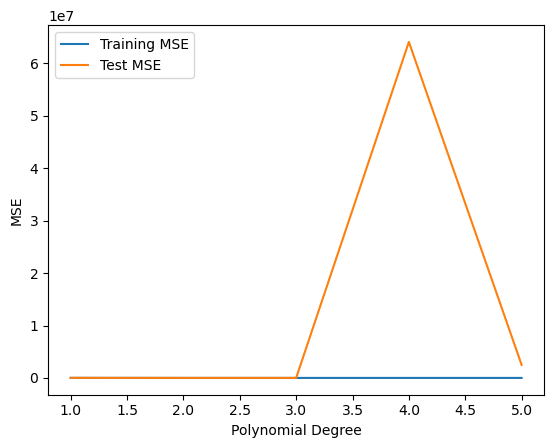

In [43]:
# Fit a linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)
# Evaluate the model on the training and test sets
train_pred = lr.predict(X_train)
test_pred = lr.predict(X_test)
train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)
print(f"Training MSE: {train_mse:.2f}")
print(f"Test MSE: {test_mse:.2f}")
# Model overfitting and underfitting using polynomial features
degrees = [1, 2, 3, 4, 5]
train_mse = []                  
test_mse = []
for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    lr_poly = LinearRegression()
    lr_poly.fit(X_train_poly, y_train)
    train_pred = lr_poly.predict(X_train_poly)
    test_pred = lr_poly.predict(X_test_poly)
    train_mse.append(mean_squared_error(y_train, train_pred))
    test_mse.append(mean_squared_error(y_test, test_pred))
# Plot the results
plt.plot(degrees, train_mse, label='Training MSE')
plt.plot(degrees, test_mse, label='Test MSE')
plt.xlabel('Polynomial Degree')
plt.ylabel('MSE')
plt.legend()
plt.show()

The results show that the model is overfitting to the training data as the polynomial degree increases, with the test MSE increasing significantly for polynomial degrees higher than 2.

# we then visualise the predictions

Text(0, 0.5, 'Weights')

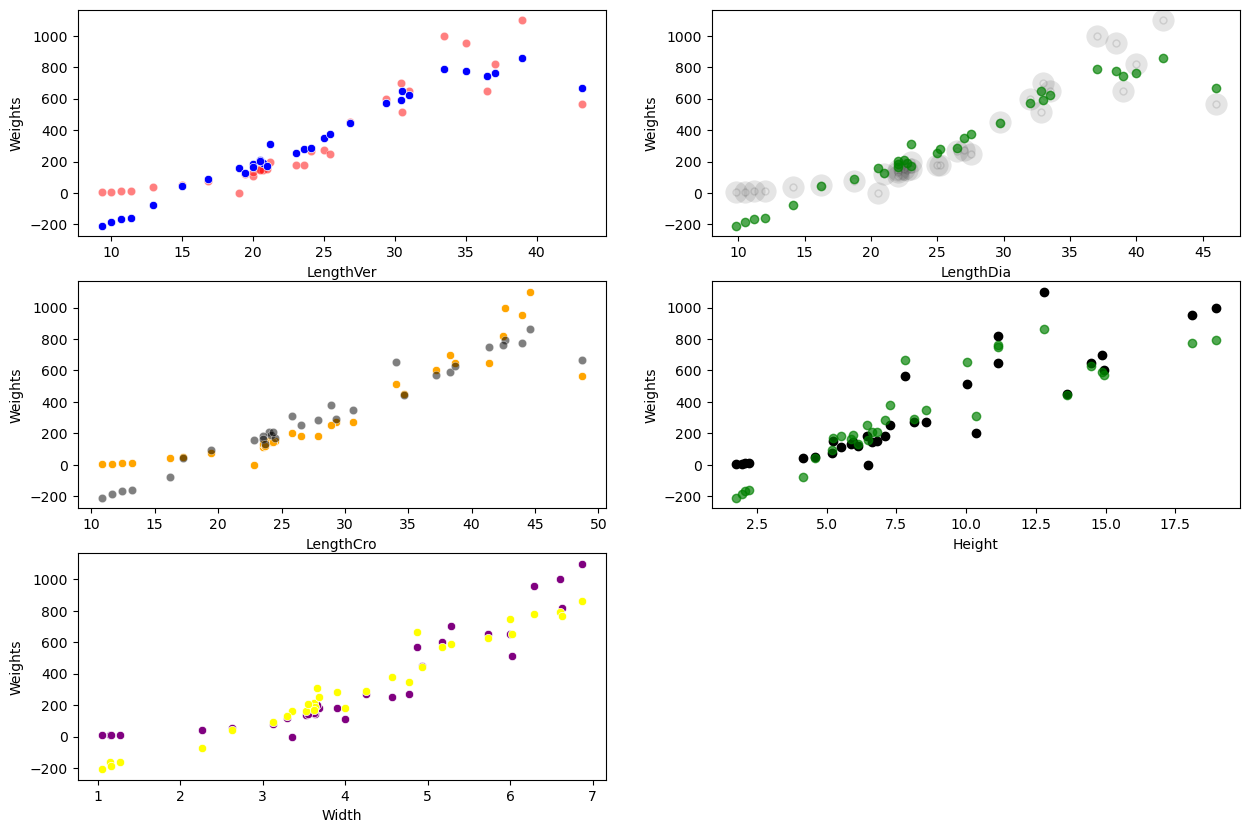

In [44]:
plt.figure(figsize = (15,10))

plt.subplot(3,2,1)
sns.scatterplot(x = X_test["LengthVer"], y = y_test, alpha = 0.5, color = "red")
sns.scatterplot(x = X_test["LengthVer"], y = y_pred, alpha = 1, color = "blue")
plt.xlabel("LengthVer")
plt.ylabel("Weights")

plt.subplot(3,2,2)
plt.scatter(x = X_test["LengthDia"], y = y_test, alpha = 0.1, color = "black", linewidth = 10)
plt.scatter(x = X_test["LengthDia"], y = y_pred, alpha = 0.68, color = "green")
plt.xlabel("LengthDia")
plt.ylabel("Weights")

plt.subplot(3,2,3)
sns.scatterplot(x = X_test["LengthCro"], y = y_test, alpha = 1, color = "orange")
sns.scatterplot(x = X_test["LengthCro"], y = y_pred, alpha = 0.5, color = "black")
plt.xlabel("LengthCro")
plt.ylabel("Weights")

plt.subplot(3,2,4)
plt.scatter(x = X_test["Height"], y = y_test, alpha = 1, color = "black")
plt.scatter(x = X_test["Height"], y = y_pred, alpha = 0.68, color = "green")
plt.xlabel("Height")
plt.ylabel("Weights")

plt.subplot(3,2,5)
sns.scatterplot(x = X_test["Width"], y = y_test, alpha = 1, color = "purple")
sns.scatterplot(x = X_test["Width"], y = y_pred, alpha = 1, color = "yellow")
plt.xlabel("Width")
plt.ylabel("Weights")

In [45]:
#table showing the actual weight and predicted weight with the difference 
final = pd.DataFrame({"Actual Weight":y_test, "Predicted Weight":y_pred, "Difference weights": y_test-y_pred})
final.reset_index(drop = True)

,Actual Weight,Predicted Weight,Difference weights
0,650.0,746.034615,-96.034615
1,51.5,44.698577,6.801423
2,180.0,282.287266,-102.287266
3,955.0,777.208209,177.791791
4,40.0,-74.802289,114.802289
5,0.0,159.717948,-159.717948
6,600.0,569.637735,30.362265
7,514.0,651.097615,-137.097615
8,272.0,349.707917,-77.707917
9,9.8,-163.684074,173.484074
